In [18]:
import torch
import torch.nn as nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np


In [19]:
train_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

In [20]:
img, target = train_data[0]
img.shape

torch.Size([1, 28, 28])

In [21]:
len(train_data.data), len(train_data.targets), len(test_data.data), len(test_data.targets)

(60000, 60000, 10000, 10000)

In [22]:
img, target

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [23]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

shape of image torch.Size([1, 28, 28])


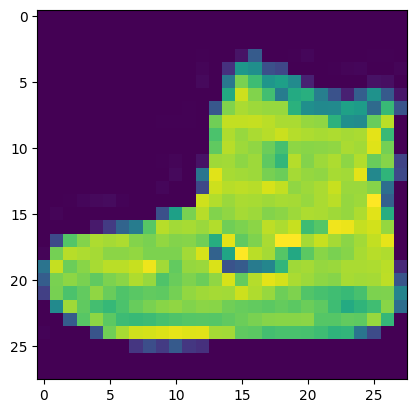

In [24]:
img, label = train_data[0]
print(f"shape of image {img.shape}")
plt.imshow(img.squeeze())
plt.show()

In [25]:
classes = train_data.classes

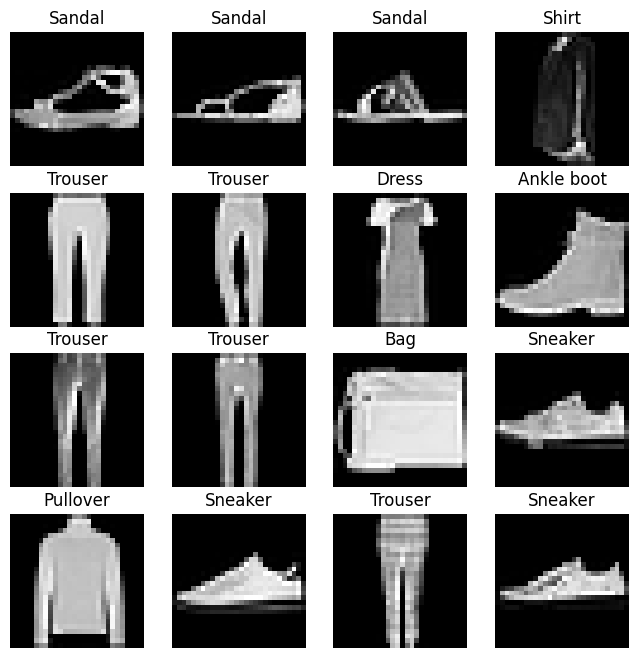

In [26]:
fig = plt.figure(figsize=(8,8))
row, col = 4, 4
for i in range(1, row*col + 1):
  random = torch.randint(0, len(train_data), size=[1]).item()
  img, target = train_data[random]
  fig.add_subplot(row, col, i)
  plt.imshow(img.squeeze(), cmap='gray')
  plt.title(classes[target])
  plt.axis(False)

In [27]:
from torch.utils.data import DataLoader

BATCH_SIZE = 32

train_dataloader = DataLoader(train_data,
    batch_size=BATCH_SIZE,
    shuffle=True
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False
)

In [28]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [29]:
flattend = nn.Flatten()
print("shape before flattenning: ", train_features_batch[0].shape,'\n shape after flattening',  flattend(train_features_batch[0]).shape)
flattend(train_features_batch[0])

shape before flattenning:  torch.Size([1, 28, 28]) 
 shape after flattening torch.Size([1, 784])


tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.0706,
         0.2471, 0.3020, 0.4118, 0.4863, 0.6157, 0.6471, 0.6353, 0.7294, 0.7059,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0078, 0.0000, 0.0314, 0.7922, 0.8039, 0.8000, 0.9961,
         1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 0.9765, 0.9725, 0.9059, 0.9529,
         1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.6275, 0.8431, 0.8000,
         0.8157, 0.8471, 0.8588, 0.8902, 0.8824, 0.8627, 0.8314, 0.8392, 0.8549,
         0.9294, 0.8118, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.6902, 0.8275,
         0.7765, 0.8000, 0.8431, 0.8980, 0.9686, 0.8863, 0.8824, 0.9255, 0.8510,
         0.8745, 0.9647, 0.7

(-0.5, 27.5, 27.5, -0.5)

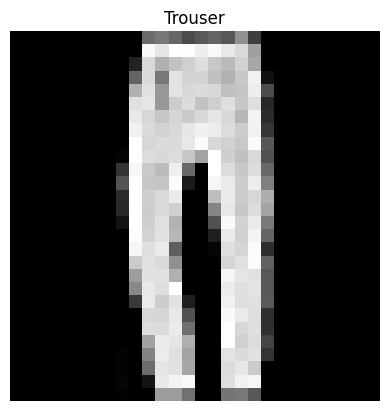

In [30]:
random = torch.randint(0, len(train_data), size=[1]).item()
img, target = train_data[random]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(classes[target])
plt.axis(False)

In [31]:
class FashionMnistM1(nn.Module):
  def __init__(self, input_features: int, hidden_units: int, output_features: int):
    super().__init__()
    self.layer = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=output_features),
        nn.ReLU()
    )
  def forward(self, x: torch.Tensor):
    return self.layer(x)

In [32]:
torch.manual_seed(40)

model = FashionMnistM1(input_features=784,
                       hidden_units=10,
                       output_features=len(classes))
# next(model.parameters())
model

FashionMnistM1(
  (layer): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
    (4): ReLU()
  )
)

In [33]:
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item()
    acc = (correct / len(y_pred)) * 100
    return acc

In [35]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.01)

In [36]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn):
    train_loss, train_acc = 0, 0
    for batch, (X, y) in enumerate(data_loader):
        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1))
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")

def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn):
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in data_loader:
            test_pred = model(X)
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1)
            )

        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [37]:
from tqdm.auto import tqdm
torch.manual_seed(42)

epochs = 10
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n---------")
    train_step(data_loader=train_dataloader,
        model=model,
        loss_fn=loss_fn,
        optimizer=optimizer,
        accuracy_fn=accuracy_fn
    )
    test_step(data_loader=test_dataloader,
        model=model,
        loss_fn=loss_fn,
        accuracy_fn=accuracy_fn
    )


  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
---------
Train loss: 1.54406 | Train accuracy: 47.34%
Test loss: 1.18582 | Test accuracy: 59.51%

Epoch: 1
---------
Train loss: 1.03223 | Train accuracy: 65.62%
Test loss: 0.87150 | Test accuracy: 70.47%

Epoch: 2
---------
Train loss: 0.79963 | Train accuracy: 72.88%
Test loss: 0.78834 | Test accuracy: 71.96%

Epoch: 3
---------
Train loss: 0.74122 | Train accuracy: 74.07%
Test loss: 0.74748 | Test accuracy: 73.43%

Epoch: 4
---------
Train loss: 0.71265 | Train accuracy: 74.55%
Test loss: 0.72991 | Test accuracy: 73.76%

Epoch: 5
---------
Train loss: 0.69473 | Train accuracy: 75.10%
Test loss: 0.71274 | Test accuracy: 74.39%

Epoch: 6
---------
Train loss: 0.68193 | Train accuracy: 75.58%
Test loss: 0.70256 | Test accuracy: 74.89%

Epoch: 7
---------
Train loss: 0.67246 | Train accuracy: 75.83%
Test loss: 0.69869 | Test accuracy: 74.87%

Epoch: 8
---------
Train loss: 0.66485 | Train accuracy: 76.12%
Test loss: 0.69030 | Test accuracy: 75.13%

Epoch: 9
---------
Train los

after restarting kernel and adjusting learning rate it's better than previous now experimenting with other apprroaches